# Description: Python for Data Analysis and Visualization - Final Project

# Name : Tej Ketan Acharya (000793886)

# Date : December 04, 2023

# ---------------------------------------------------------------------------------------------------------------

# Section 1: Dataset Exploration 

## 1.	Load the dataset into a Pandas dataframe and display the first 10 rows. 

In [1]:
import pandas as pd # Importing Pandas Library as pd
import numpy as np # Importing NumPy Library as np
import matplotlib.pyplot as plt # Importing Matplotlib Library as plt
import seaborn as sns # Importing Seaborn Library as sns

df = pd.read_csv('Popular_Baby_Names.csv') # Loading the dataset into a Pandas dataframe named 'df'
df.head(10) # Displaying the first 10 rows of the dataframe used head() function

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
5,2011,FEMALE,HISPANIC,GUADALUPE,26,62
6,2011,FEMALE,HISPANIC,HAILEY,126,8
7,2011,FEMALE,HISPANIC,HALEY,14,74
8,2011,FEMALE,HISPANIC,HANNAH,17,71
9,2011,FEMALE,HISPANIC,HAYLEE,17,71


## 2.	Display the shape of the dataset (i.e. number of rows and columns). 

In [2]:
# Displaying the shape of the dataset (i.e., number of rows and columns) using shape() function
print('The dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataset has 49509 rows and 6 columns.


## 3. Identify the data types of each column and check for any missing values (number of missing values in each column). 

In [3]:
# Identifying the data types of each column using dtypes() function
print("Data types of each column:")
print (df.dtypes)

print() # Adding a blank line

# Check for any missing values in each column using isnull() function and displaying the sum of the null values in each column using sum() function
print("Number of Missing values in each column:")
print (df.isnull().sum())

Data types of each column:
Year of Birth          int64
Gender                object
Ethnicity             object
Child's First Name    object
Count                  int64
Rank                   int64
dtype: object

Number of Missing values in each column:
Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64


## 4.	Create a bar chart that shows the total number of baby names per year for each gender. 

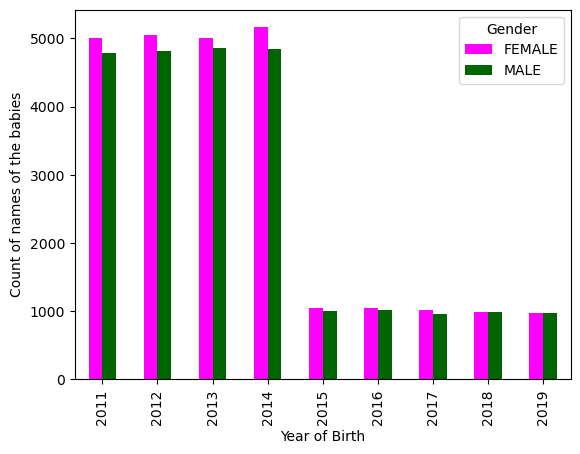

In [4]:
# Create a bar plot of names count by gender and birth year.
df.pivot_table(values="Child's First Name",columns='Gender',index='Year of Birth',aggfunc='count').plot.bar(color=['magenta', 'darkgreen'])
plt.ylabel("Count of names of the babies")
plt.show()

## 5.	Create a bar chart that shows the distribution of names (total number) by gender. 

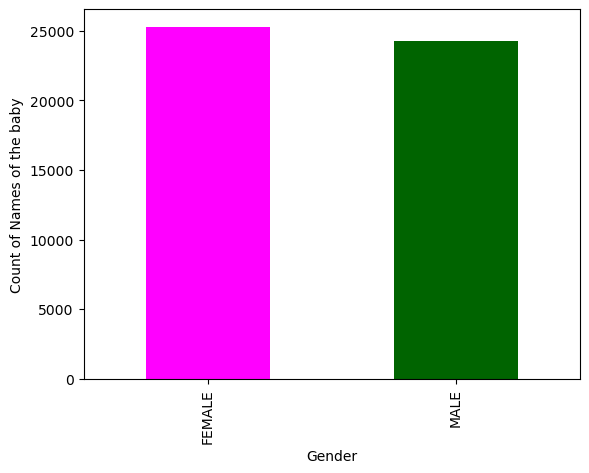

In [5]:
# Create a bar plot of names count by gender.
plt.ylabel("Count of Names of the baby")
df.groupby('Gender').count()["Child's First Name"].plot.bar(color=['magenta', 'darkgreen'])
plt.show()

## 6.	Create a pie chart that shows the distribution of names (total number in percent) by ethnicity. 

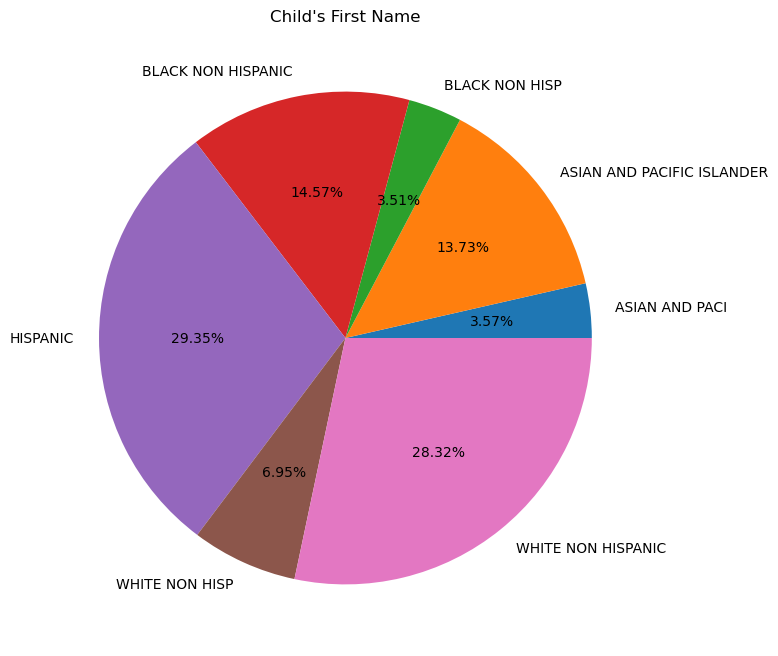

In [6]:
# Create a pie chart of names count by ethnicity.
plt.figure(figsize=[16,8])
df.groupby('Ethnicity').count()["Child's First Name"].plot(kind='pie',autopct='%1.2f%%') #autopct used to find the percentage count hold by each Ethnicity
plt.title("Child's First Name")
plt.ylabel('')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Section 2: Data Cleaning and Preparation 

## 1.	Can you find any duplicated rows in the dataset for the year 2011? 

In [7]:
# Checking for any duplicated rows in the dataset for the year 2011
duplicated_rows = df[df.duplicated() & (df['Year of Birth']==2011)]
duplicated_rows

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
543,2011,FEMALE,WHITE NON HISPANIC,SCARLETT,31,60
772,2011,FEMALE,WHITE NON HISPANIC,SERENA,16,75
808,2011,FEMALE,WHITE NON HISPANIC,SHAINA,16,75
878,2011,FEMALE,WHITE NON HISPANIC,SHAINDEL,15,76
1049,2011,FEMALE,WHITE NON HISPANIC,SHAINDY,48,44
...,...,...,...,...,...,...
9784,2011,MALE,WHITE NON HISPANIC,YOUSEF,12,95
9785,2011,MALE,WHITE NON HISPANIC,YOUSSEF,11,96
9786,2011,MALE,WHITE NON HISPANIC,ZACHARY,86,38
9787,2011,MALE,WHITE NON HISPANIC,ZALMEN,14,93


Yes, there are duplicated rows for the year 2011.

## 2.	Rename the 'Year of Birth' column to 'Year_of_Birth' and 'Child's First Name' to 'Childs_First_Name'. 

In [8]:
# Renaming the 'Year of Birth' column to 'Year_of_Birth' and 'Child's First Name' to 'Childs_First_Name' using 'rename' function
df = df.rename(columns={'Year of Birth': 'Year_of_Birth', "Child's First Name": 'Childs_First_Name'})
df.head(5)

,Year_of_Birth,Gender,Ethnicity,Childs_First_Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


## 3.	Create a new column that shows the length of each name, excluding any non-alphabetic characters (e.g. spaces or hyphens).  Name the new column 'Name_Length’. 

In [9]:
# Creating a function named 'get_name_length' to calculate the length of a name excluding non-alphabetic characters
def get_name_length(name):
    return sum(char.isalpha() for char in name) # Using a for loop to identify alphabetic characters with the isalpha() function and returning the total count.

# Using 'apply' function to apply 'get_name_length' function to each value of 'Childs_First_Name' column
df['Name_Length'] = df['Childs_First_Name'].apply(get_name_length)
df

,Year_of_Birth,Gender,Ethnicity,Childs_First_Name,Count,Rank,Name_Length
0,2011,FEMALE,HISPANIC,GERALDINE,13,75,9
1,2011,FEMALE,HISPANIC,GIA,21,67,3
2,2011,FEMALE,HISPANIC,GIANNA,49,42,6
3,2011,FEMALE,HISPANIC,GISELLE,38,51,7
4,2011,FEMALE,HISPANIC,GRACE,36,53,5
...,...,...,...,...,...,...,...
49504,2019,FEMALE,BLACK NON HISPANIC,Sanai,10,34,5
49505,2019,FEMALE,BLACK NON HISPANIC,Sariyah,10,34,7
49506,2019,FEMALE,BLACK NON HISPANIC,Sevyn,10,34,5
49507,2019,FEMALE,BLACK NON HISPANIC,Zariah,10,34,6


## 4.	Create a new column called 'Percentage' that shows the percentage of babies with each name, based on the total number of babies born in that year and gender. 

In [10]:
# Using 'groupby' function to group the data by 'Year_of_Birth' and 'Gender', and 'transform' function to perform a computation on the 'Count' column of the grouped data
total_babies = df.groupby(['Year_of_Birth', 'Gender'])['Count'].transform('sum')

#Creating 'Percentage' column dividing 'Count' by 'total_babies' and multiplying by 100
df['Percentage'] = df['Count'] / total_babies * 100
df

,Year_of_Birth,Gender,Ethnicity,Childs_First_Name,Count,Rank,Name_Length,Percentage
0,2011,FEMALE,HISPANIC,GERALDINE,13,75,9,0.008832
1,2011,FEMALE,HISPANIC,GIA,21,67,3,0.014268
2,2011,FEMALE,HISPANIC,GIANNA,49,42,6,0.033291
3,2011,FEMALE,HISPANIC,GISELLE,38,51,7,0.025817
4,2011,FEMALE,HISPANIC,GRACE,36,53,5,0.024459
...,...,...,...,...,...,...,...,...
49504,2019,FEMALE,BLACK NON HISPANIC,Sanai,10,34,5,0.037286
49505,2019,FEMALE,BLACK NON HISPANIC,Sariyah,10,34,7,0.037286
49506,2019,FEMALE,BLACK NON HISPANIC,Sevyn,10,34,5,0.037286
49507,2019,FEMALE,BLACK NON HISPANIC,Zariah,10,34,6,0.037286


## 5.	Replace the ethnic category 'Black or African American Non-Hispanic' with 'Black Non-Hispanic'. 

In [11]:
# Checking if 'Black or African American Non-Hispanic' exists in the 'Ethnicity' column
if 'Black or African American Non-Hispanic' in df['Ethnicity'].unique():
    print("'Black or African American Non-Hispanic' exists in the 'Ethnicity' column.")
else:
    print("'Black or African American Non-Hispanic' does not exist in the 'Ethnicity' column.")

'Black or African American Non-Hispanic' does not exist in the 'Ethnicity' column.


In [12]:
# Above the specified ethinc group was not found so there's no immediate need for replacement. 
# However, if required, the 'replace()' function can be used to perform this operation.
df['Ethnicity'] = df['Ethnicity'].replace('Black or African American Non-Hispanic', 'Black Non-Hispanic')
df

,Year_of_Birth,Gender,Ethnicity,Childs_First_Name,Count,Rank,Name_Length,Percentage
0,2011,FEMALE,HISPANIC,GERALDINE,13,75,9,0.008832
1,2011,FEMALE,HISPANIC,GIA,21,67,3,0.014268
2,2011,FEMALE,HISPANIC,GIANNA,49,42,6,0.033291
3,2011,FEMALE,HISPANIC,GISELLE,38,51,7,0.025817
4,2011,FEMALE,HISPANIC,GRACE,36,53,5,0.024459
...,...,...,...,...,...,...,...,...
49504,2019,FEMALE,BLACK NON HISPANIC,Sanai,10,34,5,0.037286
49505,2019,FEMALE,BLACK NON HISPANIC,Sariyah,10,34,7,0.037286
49506,2019,FEMALE,BLACK NON HISPANIC,Sevyn,10,34,5,0.037286
49507,2019,FEMALE,BLACK NON HISPANIC,Zariah,10,34,6,0.037286


# ---------------------------------------------------------------------------------------------------------------

# Section 3: Data Analysis and Visualization 

## 1.	How many children were named Jacob in 2018 and what is the ethnicity distribution of those children? 

In [13]:
# Filtering the dataframe for rows where the child's name is 'Jacob' and the year of birth is 2018 and using The shape[0] function to return the number of rows in the filtered dataframe
count_jacob_2018 = df[(df['Childs_First_Name'] == 'Jacob') & (df['Year_of_Birth'] == 2018)].shape[0]
# Print the count of 'Jacob' in 2018
print("Number of occurrences of the name Jacob in the year 2018: {}".format(count_jacob_2018))

print()

# Printing the ethnicity distribution of children named 'Jacob' in 2018 by Grouping the filtered dataframe by 'Ethnicity' and count the number of occurrences for each ethnicity
print("The Ethnicty distribution of those children are:")
print()
print(df[(df['Childs_First_Name']=='Jacob') & (df['Year_of_Birth']==2018)].groupby('Ethnicity').count().iloc[:,0])

Number of occurrences of the name Jacob in the year 2018: 4

The Ethnicty distribution of those children are:

Ethnicity
ASIAN AND PACIFIC ISLANDER    1
BLACK NON HISPANIC            1
HISPANIC                      1
WHITE NON HISPANIC            1
Name: Year_of_Birth, dtype: int64


## 2.	Create a line plot that shows the frequency of the top 5 names for the female gender between 2013 and 2015. 

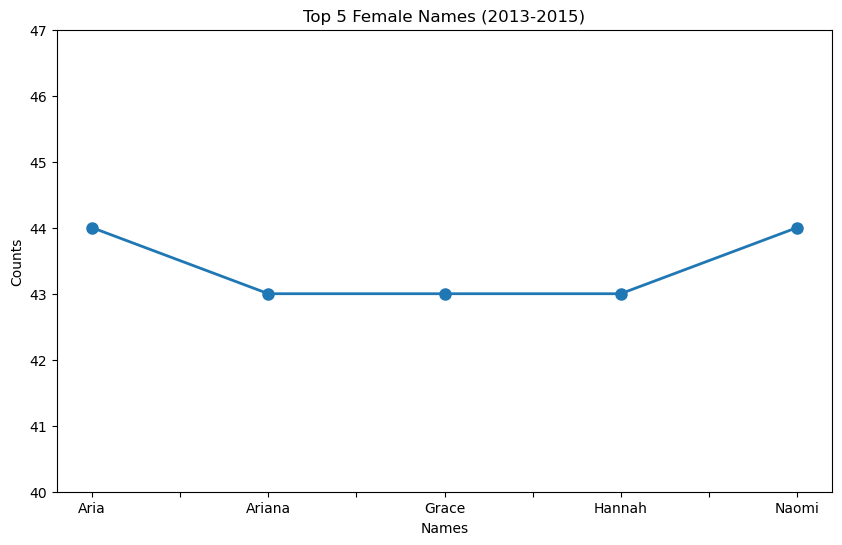

In [14]:
df2 = df[(df['Gender'] == 'FEMALE') & (df['Year_of_Birth'] >= 2013) & (df['Year_of_Birth'] <= 2015)].loc[:, 'Childs_First_Name'].value_counts()
top_5_names = df2.head()

# Convert counts to integers
top_5_names = top_5_names.astype(int)

# Plotting the top 5 names as a line plot
top_5_names.sort_index().plot(kind='line', marker='o', figsize=(10, 6), linestyle='-', linewidth=2, markersize=8)  # Sorting index for consistent plotting
plt.xlabel('Names')
plt.ylabel('Counts')
plt.title('Top 5 Female Names (2013-2015)')
plt.yticks(range(40, 48, 1))  # Set y-axis ticks from 40 to 47
plt.ylim(40, 47)  # Set y-axis limits from 40 to 47
plt.show()

## 3.	What is the relationship between the length of names and their frequency, and how does it differ between genders? The scatter plot should show the length of names on the x-axis, the frequency on the y-axis, and should use color to differentiate between male and female names. 

In [15]:
import seaborn as sns
#Finding the relation 
df1=df.pivot_table(index='Name_Length',columns='Gender',values='Rank',aggfunc='count')
df1

Gender,FEMALE,MALE
Name_Length,,
2,5.0,9.0
3,978.0,755.0
4,2993.0,3531.0
5,6902.0,7031.0
6,6520.0,6590.0
7,4347.0,4007.0
8,2176.0,1440.0
9,1198.0,674.0
10,156.0,73.0


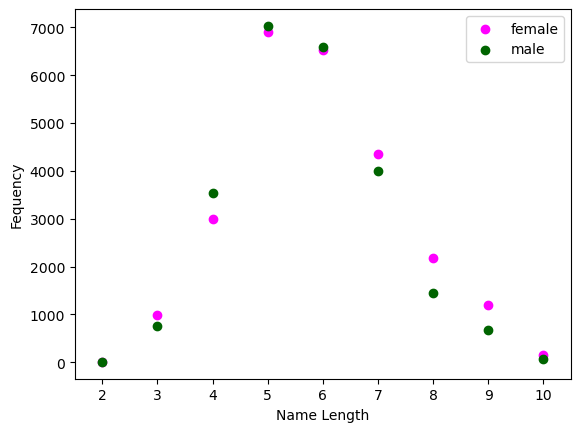

In [16]:
# Ploting the frequency of each name length for 'FEMALE' and 'MALE'
plt.scatter(x=df1.index,y=df1['FEMALE'],c='magenta', label="female") 
plt.scatter(x=df1.index,y=df1['MALE'],c='darkgreen', label="male") 
# Setting the labels, ticks, limits, and legend of the plot
plt.xlabel("Name Length")
plt.ylabel("Fequency")
plt.xticks(range(2, 11, 1))
plt.xlim(1.5, 10.5)
plt.legend()
plt.show()

The relationship between the length of names and their frequency is generally inverse for both genders, especially for names longer than 5 characters. As the length of the name increases, the frequency of those names tends to decrease.

However, there are some differences between genders. For names with 2-5 characters, the frequency of names for both genders increases with the length of the name, peaking at 5 characters. For names with 6-8 characters, the frequency decreases as the length increases, with female names slightly more frequent than male names for each name length in this range.

For names longer than 9 characters, the frequency continues to decrease for both genders, but there are no female names of length 11, while there are some male names of this length.

## 4.	Create a scatter plot that shows the correlation between name length and frequency for the 'ASIAN AND PACI' ethnicity. Consider the yearly average count for each name. 

             Name_Length     Count
Name_Length     1.000000 -0.056889
Count          -0.056889  1.000000


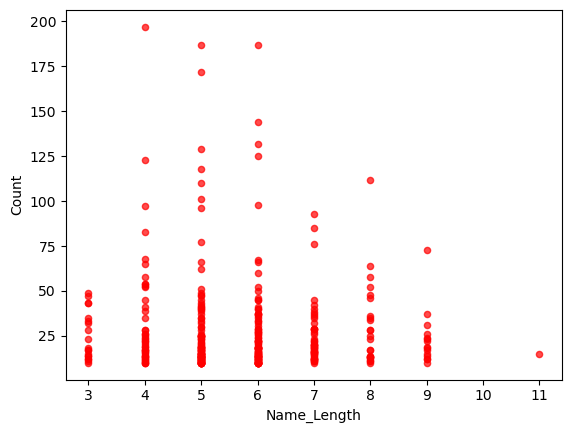

In [17]:
# Filtering  the dataframe for rows where the ethnicity is 'ASIAN AND PACI' and Grouping the filtered dataframe by 'Year_of_Birth' and 'Childs_First_Name', and calculating the mean of 'Name_Length' and 'Count' for each group
df1_corr = df[df['Ethnicity']=='ASIAN AND PACI'].groupby(['Year_of_Birth', 'Childs_First_Name']).mean(numeric_only=True)[['Name_Length','Count']]

# Printing the correlation between 'Name_Length' and 'Count'
print(df1_corr.corr())

# Ploting the correlation with 'Name_Length' on the x-axis and 'Count' on the y-axis
df1_corr.plot(kind='scatter',x='Name_Length',y='Count',alpha=0.7, c = 'red')
plt.show()